# 로지스틱 회귀분석 (Logistic regression)

In [16]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')   # Mac
# plt.rc('font', family = 'Malgun Gothic')   # Windows
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 데이터 생성

In [17]:
# 데이터 생성
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

In [21]:
X0.shape

(100, 1)

In [22]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

## 그룹별 분포 확인

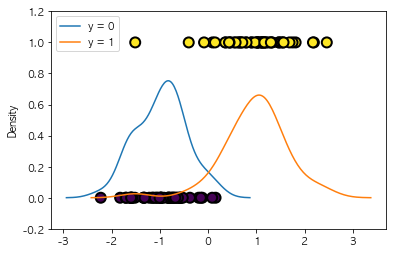

In [18]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.kdeplot(X0[y == 0, :].reshape(-1, ), label="y = 0")
sns.kdeplot(X0[y == 1, :].reshape(-1, ), label="y = 1")
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

## statsmodels 라이브러리로 모형 적합
- `sm.Logit()`

In [23]:
X = sm.add_constant(X0)   # 회귀분석에서와 마찬가지로 상수항 추가

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.160844
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.7679
Time:                        07:31:47   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.

### 로지스틱 회귀모형식
$$
\begin{align}
\log\left( \frac{\hat p}{1-\hat p} \right) &= \hat\beta_0 + \hat\beta_1 x_1 \\
                                 &= 0.2515 + 4.2382 x_1
\end{align}
$$

$$ \hat p = \hat P(Y=1|x_1) = \frac{\exp(\hat\beta_0 + \hat\beta_1x_1)}{1+ \exp(\hat\beta_0 + \hat\beta_1x_1)}$$

In [24]:
result.params

array([0.25146938, 4.23823801])

In [25]:
# Log Odds ratio
result.params[1]

4.238238005563214

In [26]:
# Odds ratio
np.exp(result.params)[1]

69.28566326934826

### 회귀계수 해석
- 여기서 $Y=1$을 성공, $Y=0$을 실패라 가정하자.
- Log Odds ratio (로그 오즈비) = $\log OR(x_1) = \beta_1 = 4.2382$
- Odds ratio (오즈비) = $OR(x_1) = \exp(\beta_1) = \exp(4.2382) = 69.2857$
- 따라서, $x_1$이 1단위 증가하면, 성공($Y=1$)할 Odds가 실패($Y=0$)할 경우의 Odds에 비해 69배 증가한다.

### 성공할 확률 $p = P(Y=1|x_1)$ 추정

In [27]:
fitted = result.fittedvalues
fitted

array([-2.14361593,  7.93353559, -5.41165604,  7.66374973, -0.58357526,
       -3.86702227,  0.63906226, -3.21461146,  4.57937202, -1.34248815,
       -2.46092416,  4.8851954 , -4.18033071, -7.47267348,  3.07996381,
       -5.41939762,  4.65809288,  4.61100455,  6.47435063,  5.369041  ,
       -6.5316439 , -0.26375795,  5.01208523, -4.9069884 ,  2.87339893,
        6.45280882,  7.3951379 ,  1.80613581,  3.17150314,  0.90439224,
        5.09530759, -0.10451532,  5.87776337, -9.17428498, -4.6532578 ,
       -3.87553814, -6.50300634, -3.25584632, -3.88527519,  6.66304299,
        2.23003061,  4.06178792, -3.11936023, -2.23452543, -6.98075116,
       -3.88115989,  2.97312809, -6.14924787, -1.44943158, -2.14649263,
        4.93745771,  3.55521562,  5.23952097, -6.17766453,  6.82228755,
       -4.59438724, -2.6699656 ,  5.56352358,  4.05243934, -3.25585317,
       -6.41893836,  0.60632978,  4.5834136 ,  5.23127444,  4.96050646,
       -2.22226163,  1.75165081, -3.63502083,  9.53696746,  4.53

In [28]:
p_hat = np.exp(fitted) / (1 + np.exp(fitted))
p_hat

array([1.04929299e-01, 9.99641612e-01, 4.44440023e-03, 9.99530677e-01,
       3.58110343e-01, 2.04918708e-02, 6.54541453e-01, 3.86195551e-02,
       9.89842887e-01, 2.07101181e-01, 7.86433474e-02, 9.92499043e-01,
       1.50630826e-02, 5.68083738e-04, 9.56058664e-01, 4.41027755e-03,
       9.90604578e-01, 9.90156041e-01, 9.98459875e-01, 9.95363005e-01,
       1.45449074e-03, 4.34440146e-01, 9.93387015e-01, 7.34044423e-03,
       9.46515676e-01, 9.98426391e-01, 9.99386145e-01, 8.58894203e-01,
       9.59747694e-01, 7.11851272e-01, 9.93911870e-01, 4.73894928e-01,
       9.97206781e-01, 1.03660581e-04, 9.44052986e-03, 2.03216369e-02,
       1.49668272e-03, 3.71173753e-02, 2.01286880e-02, 9.98724376e-01,
       9.02914042e-01, 9.83073242e-01, 4.23156909e-02, 9.66926538e-02,
       9.28741299e-04, 2.02100167e-02, 9.51345273e-01, 2.13053815e-03,
       1.90089061e-01, 1.04659429e-01, 9.92878272e-01, 9.72218645e-01,
       9.94725175e-01, 2.07097110e-03, 9.98911959e-01, 1.00072555e-02,
      

In [30]:
np.round(p_hat, 3)

array([0.105, 1.   , 0.004, 1.   , 0.358, 0.02 , 0.655, 0.039, 0.99 ,
       0.207, 0.079, 0.992, 0.015, 0.001, 0.956, 0.004, 0.991, 0.99 ,
       0.998, 0.995, 0.001, 0.434, 0.993, 0.007, 0.947, 0.998, 0.999,
       0.859, 0.96 , 0.712, 0.994, 0.474, 0.997, 0.   , 0.009, 0.02 ,
       0.001, 0.037, 0.02 , 0.999, 0.903, 0.983, 0.042, 0.097, 0.001,
       0.02 , 0.951, 0.002, 0.19 , 0.105, 0.993, 0.972, 0.995, 0.002,
       0.999, 0.01 , 0.065, 0.996, 0.983, 0.037, 0.002, 0.647, 0.99 ,
       0.995, 0.993, 0.098, 0.852, 0.026, 1.   , 0.989, 0.014, 0.001,
       1.   , 0.122, 0.999, 0.001, 0.005, 0.987, 0.997, 0.974, 0.702,
       0.084, 0.012, 0.002, 0.927, 0.018, 0.053, 0.963, 0.994, 0.997,
       0.935, 0.894, 0.001, 1.   , 0.89 , 0.045, 0.054, 0.058, 0.067,
       0.404])

### 추정된 그룹 (Y)

In [31]:
y_hat = np.array([1 if p > 0.5 else 0 for p in p_hat])
y_hat

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [32]:
# 표로 확인
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat)

array([[47,  2],
       [ 3, 48]])

### 새로운 값 예측

In [33]:
# 새로운 데이터 생성
new_x = sm.add_constant(np.array([-1, 0, 1]))
new_x

array([[ 1., -1.],
       [ 1.,  0.],
       [ 1.,  1.]])

In [34]:
# predict 함수로 성공할 확률 예측
result.predict(new_x)

array([0.01822141, 0.56253813, 0.98890065])

In [35]:
# 추정된 확률을 가지고 그룹으로 분류
np.array([1 if p > 0.5 else 0 for p in result.predict(new_x)])

array([0, 1, 1])

## scikit-learn 라이브러리로 모형 적합
- `LogisticRegression()`
- sklearn에서는 기본적으로 모형 적합에서 페널티를 주어 과적합되는 것을 방지해주는데 이를 제거하는 옵션은 `penalty = "none"`임

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = "none").fit(X0, y)
print(model.intercept_, model.coef_)

[0.25146948] [[4.23823702]]


### 새로운 값 예측

In [37]:
new_x = np.array([-1, 0, 1]).reshape(-1, 1)
model.predict(new_x)

array([0, 1, 1])

# 예제) 미국 의대생의 입학관련 데이터

- `Acceptance`: 0이면 불합격, 1이면 합격
- `BCPM`: Bio/Chem/Physics/Math 과목의 학점 평균
- `GPA`: 전체과목 학점 평균
- `VR`: MCAT Verbal reasoning 과목 점수
- `PS`: MCAT Physical sciences 과목 점수
- `WS`: MCAT Writing sample 과목 점수
- `BS`: MCAT Biological sciences 과목 점수
- `MCAT`: MCAT 촘점
- `Apps`: 의대 지원 횟수

In [38]:
# 데이터 가져오기
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


In [39]:
# 그룹별 개수 확인
df_med.Accept.groupby(df_med.Accept).count()

Accept
A    30
D    25
Name: Accept, dtype: int64

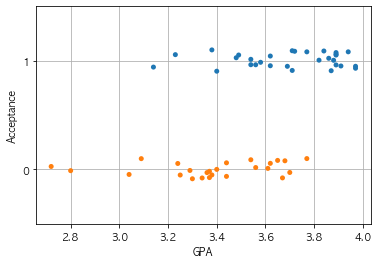

In [40]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid()
plt.show()

### 로지스틱 회귀모형 적합

In [41]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.5913
Time:                        07:53:02   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

### 유의하지 않은 변수 제외하고 모형 적합

In [42]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.3315
Time:                        07:54:17   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

### 로지스틱 회귀모형식
$$
\begin{align}
\log\left( \frac{\hat p}{1-\hat p} \right) &= \hat\beta_0 + \hat\beta_1 \text{PS} + \hat\beta_2 \text{BS} \\
                                 &= -15.5427 + 0.4798 \text{PS} + 1.1464 \text{BS}
\end{align}
$$

$$ \hat p = \hat P(\text{Acceptance}=1|\text{PS}, \text{BS}) = \frac{\exp(\hat\beta_0 + \hat\beta_1 \text{PS} + \hat\beta_2 \text{BS})}{1+ \exp(\hat\beta_0 + \hat\beta_1 \text{PS} + \hat\beta_2 \text{BS})}$$

In [43]:
# Log Odds ratio
result_med.params[1:]

PS    0.479766
BS    1.146406
dtype: float64

In [44]:
# Odds ratio
np.exp(result_med.params)[1:]

PS    1.615697
BS    3.146864
dtype: float64

### 회귀계수 해석
- PS에 대한 Odds ratio (오즈비) = $OR(\text{PS}) = \exp(\beta_1) = \exp(0.4798) = 1.6157$
- 따라서, PS가 1점 증가하면, 합격($\text{Acceptance}=1$)할 Odds가 불합격($\text{Acceptance}=0$)할 경우의 Odds에 비해 1.6배 증가한다.

- BS에 대한 Odds ratio (오즈비) = $OR(\text{BS}) = \exp(\beta_2) = \exp(1.1464) = 3.1469$
- 따라서, BS가 1점 증가하면, 합격($\text{Acceptance}=1$)할 Odds가 불합격($\text{Acceptance}=0$)할 경우의 Odds에 비해 3.1배 증가한다.